#Parte I

En esta entrega se intenta predecir el precio de un vehículo usado teniendo como variables de entrada marca, modelo, año de fabricación, kilometraje y estado de conservación.

Finalmente, de acuerdo al análisis realizado, las variables que cuentan con una correlación significativa con el precio son el año de fabricación y el kilometraje.

Teniendo en cuenta este análisis se prueban varios modelos de regresión lineal simple y un modelo de regresión lineal múltiple, obteniendo como resultado una estimación mucho mas acertada en este último caso.

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

#Car Price Prediction Dataset

The dataset used in this analysis contains information about car prices and their associated features. Here's a brief overview of the dataset:

Columns: The dataset consists of several columns including:

Make: The brand or manufacturer of the car (e.g., Toyota, Honda, Ford).
Model: The specific model of the car (e.g., Camry, Civic, F-150).
Year: The manufacturing year of the car.
Mileage: The total mileage (in miles) of the car.
Condition: The condition of the car, categorized as Excellent, Good, or Fair.
Price: The price of the car.
Size: The dataset contains a certain number of rows, each representing a unique car entry, and a set of columns describing various attributes of the cars.

Source: The dataset was generated synthetically for the purpose of this analysis. It was created using a Python script that simulated car prices based on random values and predefined factors to mimic real-world variability.

Purpose: The dataset is used for exploratory data analysis (EDA) and modeling tasks. It serves as a sample dataset to demonstrate data analysis techniques, such as data cleaning, visualization, and predictive modeling, in a car price prediction context.

Data Types: The dataset consists of both numerical and categorical data types. Numerical features include Year, Mileage, and Price, while categorical features include Make, Model, and Condition.

Missing Values: There are no missing values in the dataset, ensuring that the analysis can be performed smoothly without the need for imputation or handling missing data.

Overall, this dataset provides a foundation for analyzing and understanding factors influencing car prices, exploring relationships between features, and building predictive models to estimate car prices based on given attributes.

Fuente:
https://www.kaggle.com/datasets/mrsimple07/car-prices-prediction-data?resource=download

In [71]:
df1 = pd.read_csv('https://raw.githubusercontent.com/NicolasBSM/dscoderproyect/main/CarPricesPrediction.csv')

In [72]:
df1

,Unnamed: 0,Make,Model,Year,Mileage,Condition,Price
0,0,Ford,Silverado,2022,18107,Excellent,19094.75
1,1,Toyota,Silverado,2014,13578,Excellent,27321.10
2,2,Chevrolet,Civic,2016,46054,Good,23697.30
3,3,Ford,Civic,2022,34981,Excellent,18251.05
4,4,Chevrolet,Civic,2019,63565,Excellent,19821.85
...,...,...,...,...,...,...,...
995,995,Nissan,Camry,2010,149032,Excellent,24548.50
996,996,Chevrolet,F-150,2014,20608,Excellent,26969.70
997,997,Ford,Altima,2016,109851,Good,20507.55
998,998,Toyota,Silverado,2010,11704,Good,31414.90


La siguiente celda elimina la primera columna llamada "Unnamed: 0", ya que no cumple ninguna función al ser un doble índice

In [73]:
df1=df1.drop('Unnamed: 0',axis=1)

In [74]:
df1

,Make,Model,Year,Mileage,Condition,Price
0,Ford,Silverado,2022,18107,Excellent,19094.75
1,Toyota,Silverado,2014,13578,Excellent,27321.10
2,Chevrolet,Civic,2016,46054,Good,23697.30
3,Ford,Civic,2022,34981,Excellent,18251.05
4,Chevrolet,Civic,2019,63565,Excellent,19821.85
...,...,...,...,...,...,...
995,Nissan,Camry,2010,149032,Excellent,24548.50
996,Chevrolet,F-150,2014,20608,Excellent,26969.70
997,Ford,Altima,2016,109851,Good,20507.55
998,Toyota,Silverado,2010,11704,Good,31414.90


##Distribución de precios

<Axes: xlabel='Price', ylabel='Count'>

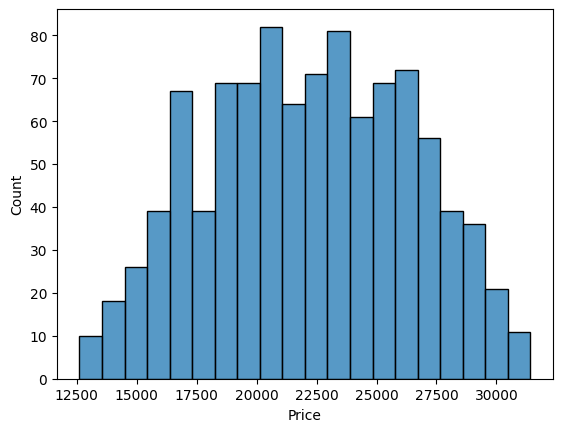

In [75]:
sns.histplot(df1.Price, bins=20)

##Correlaciones

In [76]:
df1.corr()

<ipython-input-76-49b3fcfeb4d1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr()


,Year,Mileage,Price
Year,1.000000,-0.01685,-0.883093
Mileage,-0.016850,1.00000,-0.454250
Price,-0.883093,-0.45425,1.000000


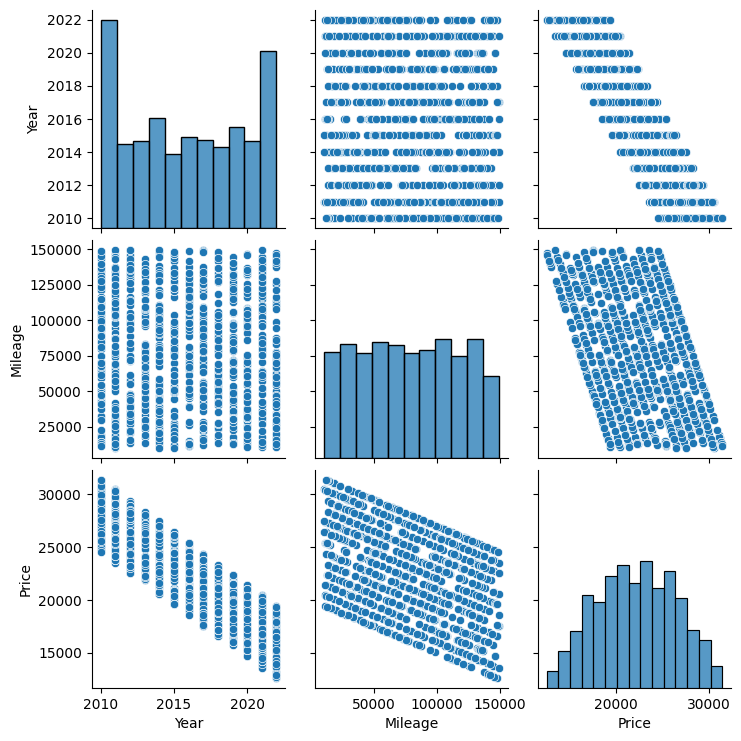

In [77]:
sns.pairplot(df1)

###Año de Fabricación vs Precio

El siguiente boxplot muestra un resumen de las distribuciones de precios en relación al año de fabricación.

Se observa una fuerte correlación negativa ya que al aumentar el año de fabricación, disminuye el precio promedio del vehículo.


<Axes: xlabel='Year', ylabel='Price'>

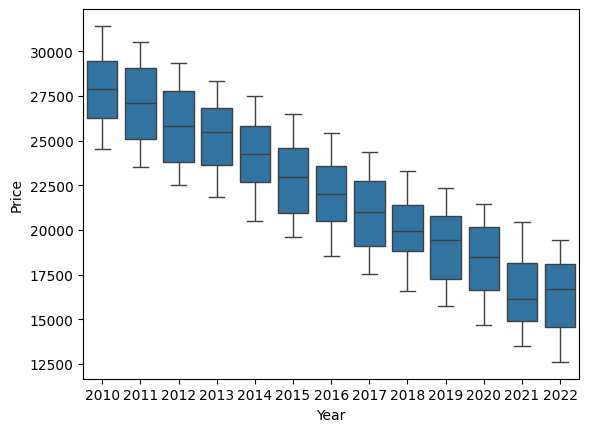

In [78]:
sns.boxplot(df1,x='Year',y='Price')

###Modelo, Fabricante y Condición vs Precio

Los siguientes boxplots muestran las distribuciones de precios en relación al fabricante, modelo y condición del vehículo.

No se observa correlación significativa entre alguna de estas variables  y el precio del vehículo.

<Axes: xlabel='Make', ylabel='Price'>

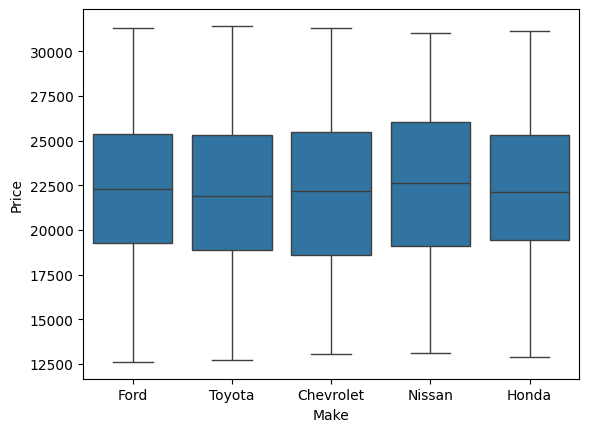

In [79]:
sns.boxplot(df1,x='Make',y='Price')

In [80]:
df1['Model'].value_counts()

Altima       226
Camry        212
Silverado    192
F-150        188
Civic        182
Name: Model, dtype: int64

<Axes: xlabel='Model', ylabel='Price'>

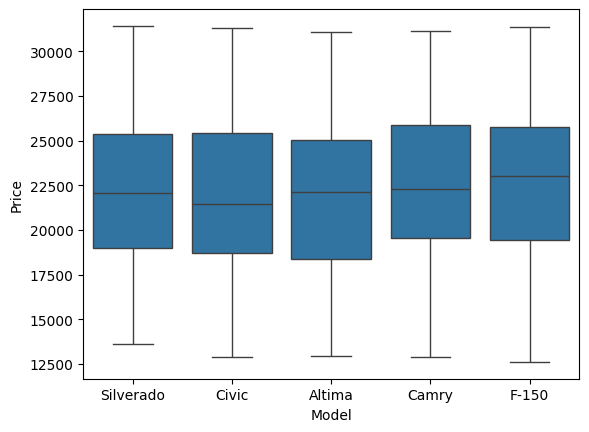

In [81]:
sns.boxplot(df1,x='Model',y='Price')

<Axes: xlabel='Condition', ylabel='Price'>

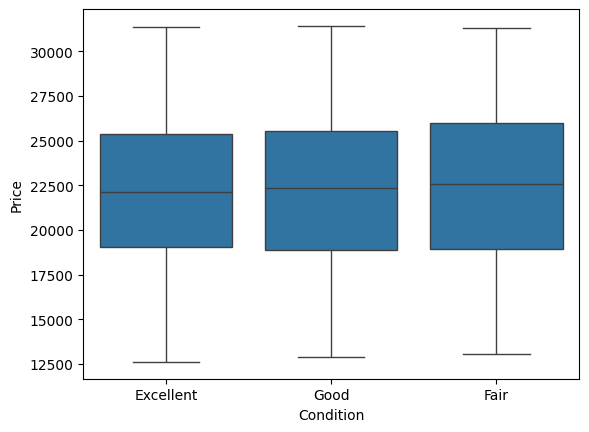

In [82]:
sns.boxplot(df1,x='Condition',y='Price')

###Kilometraje vs Precio

A continuación se analiza la correlación entre el kilometraje del vehículo y su precio.

Se observa una fuerte correlación negativa ya que al aumentar el kilometraje, disminuye el precio promedio del vehículo.

<Axes: xlabel='Mileage', ylabel='Price'>

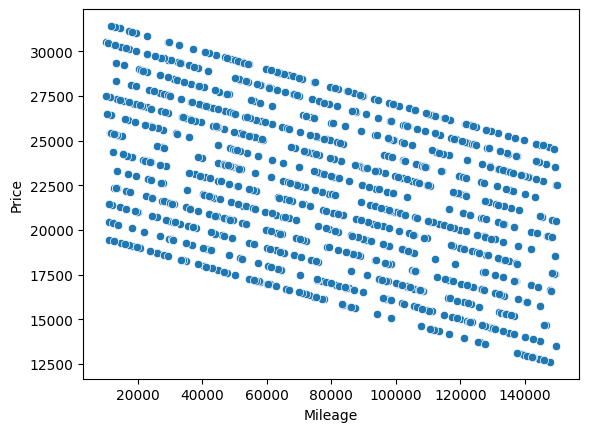

In [83]:
sns.scatterplot(df1,x='Mileage',y='Price')

##Regresion Lineal

In [84]:
from sklearn.linear_model import LinearRegression as LR

###Regresion Lineal Año vs Precio

In [85]:
x1=df1.drop(['Make','Model','Mileage','Condition','Price'],axis=1)
y1=df1.Price

In [86]:
modelo1=LR()
modelo1.fit(x1,y1)

LinearRegression()

In [87]:
y1_pred=modelo1.predict(df1[['Year']])

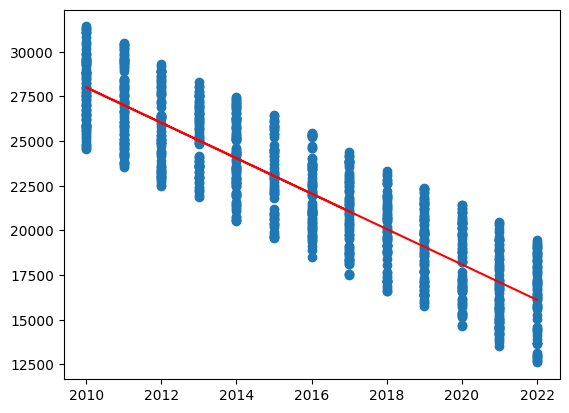

In [88]:
plt.scatter(df1.Year,df1.Price)
plt.plot(df1.Year,y1_pred,'r')

###Regresion Lineal Kilometraje vs Precio

In [89]:
x2=df1.drop(['Make','Model','Year','Condition','Price'],axis=1)
y2=df1.Price

In [90]:
modelo2=LR()
modelo2.fit(x2,y2)

LinearRegression()

In [91]:
y2_pred=modelo2.predict(df1[['Mileage']])

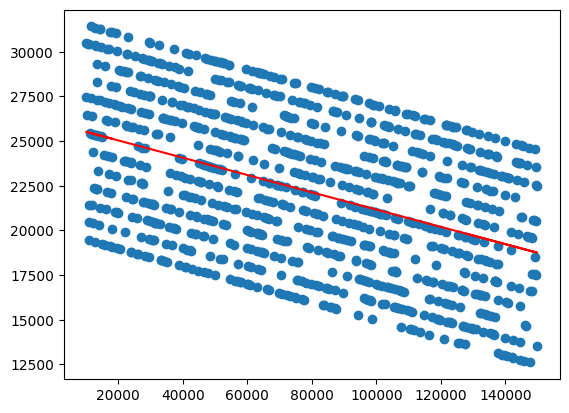

In [92]:
plt.scatter(df1.Mileage,df1.Price)
plt.plot(df1.Mileage,y2_pred,'r')

###Regresion Lineal Multiple (Año y Kilometraje) vs Precio




In [93]:
x3=df1.drop(['Make','Model','Condition','Price'],axis=1)
y3=df1.Price

In [94]:
x3

,Year,Mileage
0,2022,18107
1,2014,13578
2,2016,46054
3,2022,34981
4,2019,63565
...,...,...
995,2010,149032
996,2014,20608
997,2016,109851
998,2010,11704


In [95]:
y3

0      19094.75
1      27321.10
2      23697.30
3      18251.05
4      19821.85
         ...   
995    24548.50
996    26969.70
997    20507.55
998    31414.90
999    18580.60
Name: Price, Length: 1000, dtype: float64

In [96]:
modelo3=LR()
modelo3.fit(x3,y3)

LinearRegression()

In [97]:
modelo3.coef_

array([-9.99999435e+02, -5.00000558e-02])

In [98]:
modelo3.intercept_

2041998.9169932904

In [99]:
y3_pred=modelo3.predict(x3)

###Comparación de modelos



####Comparacion de errores promedio al cuadrado "MSE"

Comparando los errores promedio al cuadrado de los 3 modelos se observa que, por amplia diferencia, el mejor de los 3 modelos es la regresión lineal múltiple.

In [ ]:
from sklearn.metrics import mean_squared_error as MSE

In [ ]:
mse_modelo1=MSE(y1,y1_pred)
mse_modelo2=MSE(y2,y2_pred)
mse_modelo3=MSE(y3,y3_pred)

In [ ]:
[mse_modelo1,
mse_modelo2,
mse_modelo3]

####Comparacion de "r2"

La comparación de la métrica "r2" para los 3 modelos arroja que el modelo 3 bivariado, además de ser el mejor modelo de los 3 planteados, es un excelente modelo ya que da un valor de r2 muy cercano a 1.

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_modelo1=r2_score(y1,y1_pred)
r2_modelo2=r2_score(y2,y2_pred)
r2_modelo3=r2_score(y3,y3_pred)

In [ ]:
[r2_modelo1, r2_modelo2, r2_modelo3]

#Dataset 2

Context
During the time when Machine Learning and Deep Learning are booming so much , it is very important to understand that all this knowledge is not of any use if we cant apply it to different areas and impact the humanity.

This dataset will help you apply your existing knowledge to great use. Applying Knowledge to field of Medical Science and making the task of Physician easy is the main purpose of this dataset. This dataset has 132 parameters on which 42 different types of diseases can be predicted.

All the best !

Content
Complete Dataset consists of 2 CSV files . One of them is training and other is for testing your model.

Each CSV file has 133 columns. 132 of these columns are symptoms that a person experiences and last column is the prognosis.

These symptoms are mapped to 42 diseases you can classify these set of symptoms to.

You are required to train your model on training data and test it on testing data

Inspiration
Just make your best effort to make world a better place by applying all the knowledge you have to different fields.

Fuente:
https://www.kaggle.com/datasets/tejpal123/human-disease-prediction-dataset

In [ ]:
df2 = pd.read_csv('https://raw.githubusercontent.com/NicolasBSM/dscoderproyect/main/HumanDiseasePrediction.csv')

In [ ]:
df2